In [1]:
import sys
print(sys.version)
from qiskit import *

IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q') # Get the IBM-Q Provider
backend = provider.get_backend('ibmqx2') # Target 'ibmqx2' for all upcomming backend work
print('Done')

3.6.6 (v3.6.6:4cf1f54eb7, Jun 27 2018, 03:37:03) [MSC v.1900 64 bit (AMD64)]
Done


# Simple qubit in super positision entangled with another qubit
### If correct, we should see a near 50/50 distrobution between 00 and 11, there will be some 01 and 10 noise, As expected.

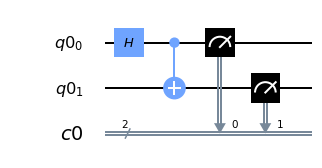

In [2]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [3]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


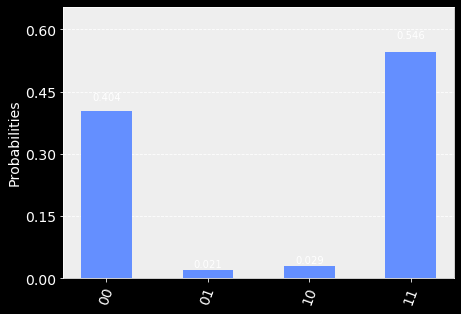

In [6]:
from qiskit.visualization import plot_histogram
from matplotlib import style # I use dark theme

style.use('dark_background') # I use dark theme

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

# Lets invert one of the entangled qubits
### If correct, we should see a near 50/50 distrobution between 01 and 10, there will be some 00 and 11 noise, As expected.

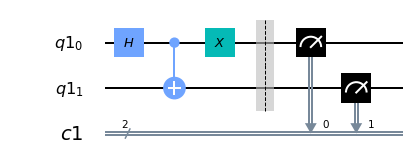

In [7]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.x(qr[0]) # Invert qr[0]
circuit.barrier(range(2)) # Sepperate the measurements to not ruin the entangled qubits
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [8]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


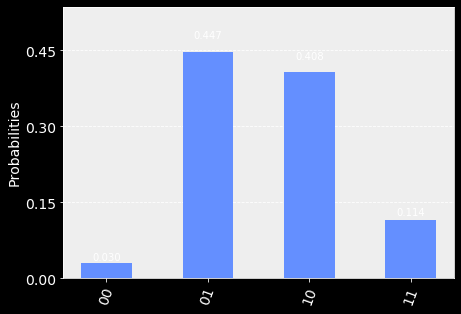

In [9]:
from qiskit.visualization import plot_histogram
from matplotlib import style # I use dark theme

style.use('dark_background') # I use dark theme

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

# 2nd H gate
Wha happens if we go through an H gate a seocn time? If correct, we break entanglement and have an even distrobution. 

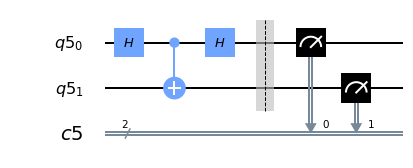

In [15]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.h(qr[0]) # Invert qr[0]
circuit.barrier(range(2)) # Sepperate the measurements to not ruin the entangled qubits
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [16]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


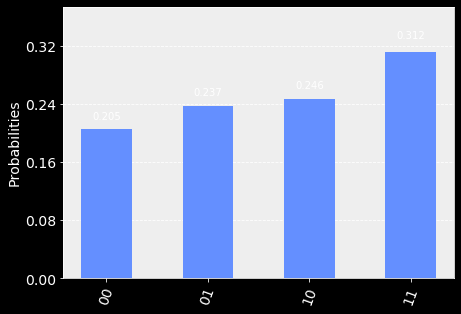

In [17]:
from qiskit.visualization import plot_histogram
from matplotlib import style # I use dark theme

style.use('dark_background') # I use dark theme

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

# Can we daisy chain entanglement?
If correct, we should see 50/50 distrobution across three qubits, 000 and 111. There will be some noise.

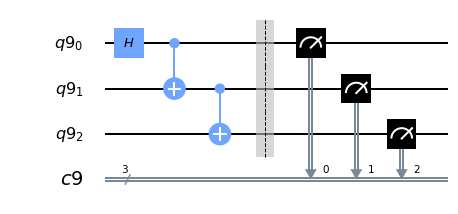

In [21]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.cx(qr[1], qr[2]) # Entalgle qr[1] with qr[2] 
circuit.barrier(range(3)) # Sepperate the measurements to not ruin the entangled qubits
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [22]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


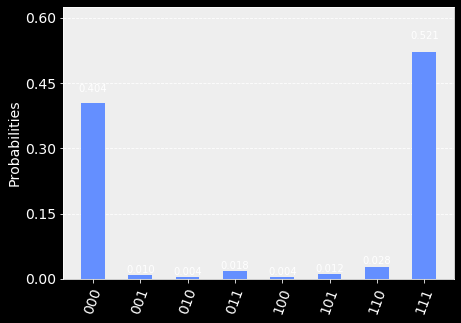

In [23]:
from qiskit.visualization import plot_histogram
from matplotlib import style # I use dark theme

style.use('dark_background') # I use dark theme

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])

# How stable is the entanglement daisy chain?
If stable, we should see a 50/50 distrobution across 0000 and 1111, there will be some noise

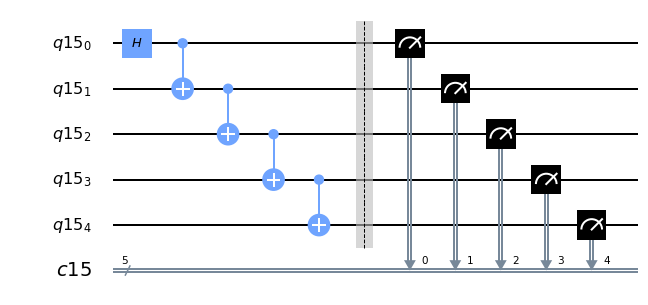

In [31]:
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor

qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0]) # Generate qubit in superposition 
circuit.cx(qr[0], qr[1]) # Entalgle with qr[1] 
circuit.cx(qr[1], qr[2]) # Entalgle qr[1] with qr[2] 
circuit.cx(qr[2], qr[3]) # Entalgle qr[2] with qr[3] 
circuit.cx(qr[3], qr[4]) # Entalgle qr[3] with qr[4] 
circuit.barrier(range(5)) # Sepperate the measurements to not ruin the entangled qubits
circuit.measure(qr, cr) # Measure
circuit.draw(output="mpl")

In [32]:
job = execute(circuit, backend, shots=1024)
job_monitor(job)

Job Status: job has successfully run


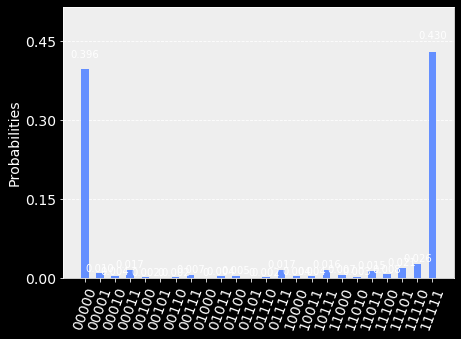

In [33]:
from qiskit.visualization import plot_histogram
from matplotlib import style # I use dark theme

style.use('dark_background') # I use dark theme

result = job.result()
counts = result.get_counts(circuit)
plot_histogram([counts])